In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df = pd.read_excel('/Applications/Repos/Repo/expedition/Python/EDA/Flight/flight_price.xlsx')

In [68]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [70]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [71]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [72]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]

In [73]:
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]

In [74]:
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [75]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [76]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [77]:
df['Arrival_hour'] = df['Arrival_Time'].apply (lambda x: x.split(' ')[0]).apply(lambda x: x.split(':')[0])

In [78]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,21


In [79]:
df['Arrival_Min'] = df['Arrival_Time'].apply (lambda x: x.split(' ')[0]).apply(lambda x: x.split(':')[1])

In [80]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,21,35


In [81]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [82]:
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])

In [83]:
df['Dep_Min'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [84]:
df.drop('Dep_Time',axis=1,inplace=True)

In [85]:
df.drop('Route',axis=1,inplace=True)

In [86]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,05,2019,09,25,09,45


In [87]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [88]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [89]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,05,2019,09,25,09,45


In [90]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)

In [91]:
df['Arrival_Min']=df['Arrival_Min'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Min']=df['Dep_Min'].astype(int)


In [92]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)


In [93]:
df.drop('Additional_Info',axis=1,inplace=True)

In [94]:
df.head(6)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,2019,21,35,16,50
5,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,3873,24,6,2019,11,25,9,0


In [95]:
df['Duration_hour'] = df['Duration'].apply(lambda x: x.split(' ')[0]).apply(lambda x: x.split('h')[0].strip() if 'h' in x else 0)

In [96]:
df['Duration_Min'] = df['Duration'].apply(lambda x: x.split(' ')[-1]).apply(lambda x: x.split('m')[0].strip() if 'm' in x else 0)

In [97]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_Min'] =df['Duration_Min'].astype(int)


In [98]:
df.drop('Duration',axis=1,inplace=True)

In [99]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45


Which airline offers the cheapest flights on average?`

In [100]:
average_price_per_airline = df.groupby('Airline')['Price'].mean().sort_values().round(2)

In [101]:
cheapest_airpline = average_price_per_airline.idxmin()
cheapest_airpline

'Trujet'

In [102]:
cheapest_price = average_price_per_airline.min()
cheapest_price

4140.0

Which airline has the most expensive flights?

In [103]:
expensive_airpline = average_price_per_airline.idxmax()
expensive_airpline

'Jet Airways Business'

How does price vary across airlines?

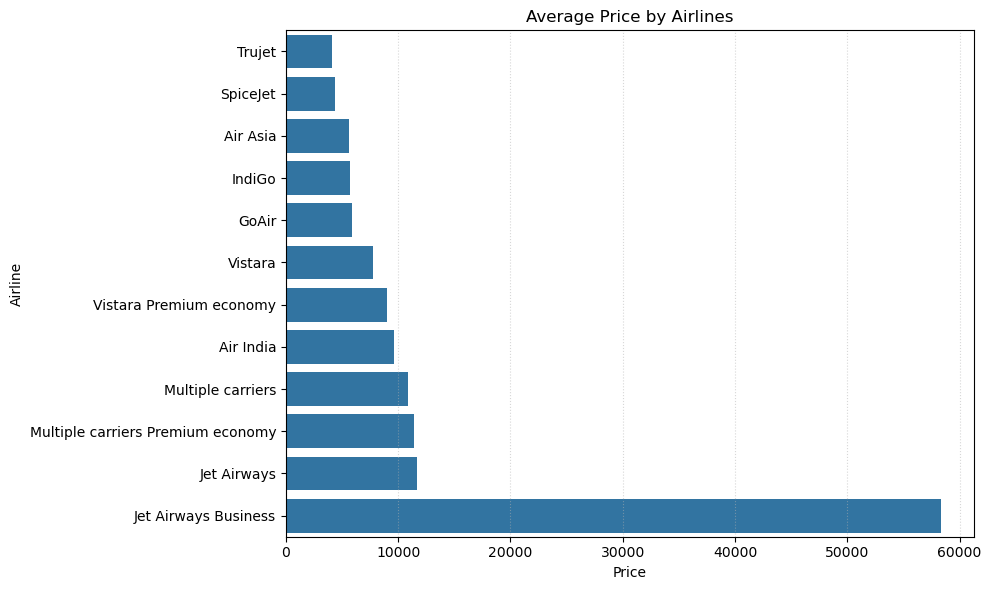

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(y=average_price_per_airline.index,x=average_price_per_airline.values)
plt.title('Average Price by Airlines')
plt.xlabel('Price')
plt.ylabel('Airline')
plt.grid(True,axis='x',linestyle='dotted',alpha=0.5)
plt.tight_layout()
plt.show()

Are there any airlines that only operate non-stop or 1-stop flights?

In [105]:
# Step 1: Get the unique Total_Stops per airline

airline_stops = df.groupby('Airline')['Total_Stops'].unique()

# airlines with either 0 or 1 stops 

limited_stop_airline = airline_stops[airline_stops.apply(lambda x: set(x).issubset({0,1}))]
print("Airlines that only operate non-stop or 1-stop flights:")
print(limited_stop_airline)

Airlines that only operate non-stop or 1-stop flights:
Series([], Name: Total_Stops, dtype: object)


Which routes (source → destination) are the most popular?

In [106]:
route_counts = df.groupby(['Source','Destination']).size().reset_index()
route_counts

,Source,Destination,0
0,Banglore,Delhi,1265
1,Banglore,New Delhi,932
2,Chennai,Kolkata,381
3,Delhi,Cochin,4537
4,Kolkata,Banglore,2871
5,Mumbai,Hyderabad,697


Which source-destination pairs are the least frequent?

In [107]:
least_frequent_route = df.groupby(['Source','Destination']).size().sort_values().reset_index(name='Count')
least_frequent_route

,Source,Destination,Count
0,Chennai,Kolkata,381
1,Mumbai,Hyderabad,697
2,Banglore,New Delhi,932
3,Banglore,Delhi,1265
4,Kolkata,Banglore,2871
5,Delhi,Cochin,4537


Do prices vary by route (not just source/destination separately)?

In [108]:
df['Route'] = df['Source'] + '-' + df['Destination']
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min,Route
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50,Banglore-New Delhi
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25,Kolkata-Banglore
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0,Delhi-Cochin
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25,Kolkata-Banglore
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45,Banglore-New Delhi


In [109]:
route_prices = df.groupby('Route')['Price'].agg(Average_price= 'mean',
 Min_price = 'min',
 Max_price = 'max',
 Total_flights='count').reset_index().round(2)
route_prices

,Route,Average_price,Min_price,Max_price,Total_flights
0,Banglore-Delhi,5143.92,3257,8541,1265
1,Banglore-New Delhi,11917.72,3383,79512,932
2,Chennai-Kolkata,4789.89,3145,19630,381
3,Delhi-Cochin,10539.44,3876,52285,4537
4,Kolkata-Banglore,9158.39,3480,31945,2871
5,Mumbai-Hyderabad,5059.71,1759,25139,697


In [110]:
# Top 10 expensive route

expensive_routes = route_prices.sort_values(by='Average_price',ascending=True).head(10)
expensive_routes



,Route,Average_price,Min_price,Max_price,Total_flights
2,Chennai-Kolkata,4789.89,3145,19630,381
5,Mumbai-Hyderabad,5059.71,1759,25139,697
0,Banglore-Delhi,5143.92,3257,8541,1265
4,Kolkata-Banglore,9158.39,3480,31945,2871
3,Delhi-Cochin,10539.44,3876,52285,4537
1,Banglore-New Delhi,11917.72,3383,79512,932


In [111]:
# Top 10 Cheap routes

cheapest_routes = route_prices.sort_values(by='Average_price',ascending=False).head(10)
cheapest_routes

,Route,Average_price,Min_price,Max_price,Total_flights
1,Banglore-New Delhi,11917.72,3383,79512,932
3,Delhi-Cochin,10539.44,3876,52285,4537
4,Kolkata-Banglore,9158.39,3480,31945,2871
0,Banglore-Delhi,5143.92,3257,8541,1265
5,Mumbai-Hyderabad,5059.71,1759,25139,697
2,Chennai-Kolkata,4789.89,3145,19630,381


Which cities are most commonly used as Source and Destination?

In [112]:
common_source =  df['Source'].value_counts().head().reset_index()
common_source

,Source,count
0,Delhi,4537
1,Kolkata,2871
2,Banglore,2197
3,Mumbai,697
4,Chennai,381


In [113]:
common_destination = df['Destination'].value_counts().head().reset_index()
common_destination

,Destination,count
0,Cochin,4537
1,Banglore,2871
2,Delhi,1265
3,New Delhi,932
4,Hyderabad,697


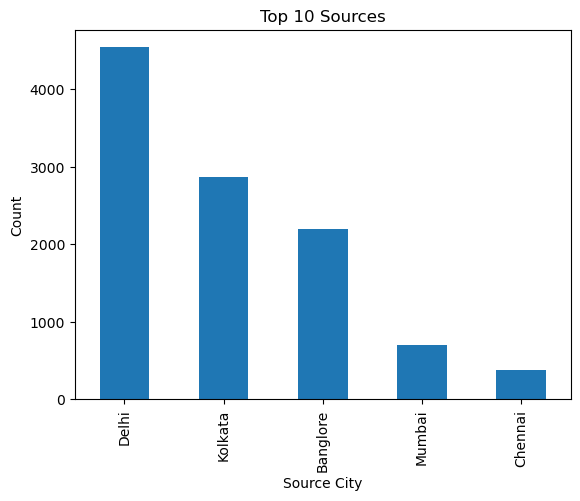

In [114]:
# Top Source Cities

df['Source'].value_counts().head(10).plot(kind='bar',title = 'Top 10 Sources')
plt.xlabel('Source City')
plt.ylabel('Count')
plt.show()

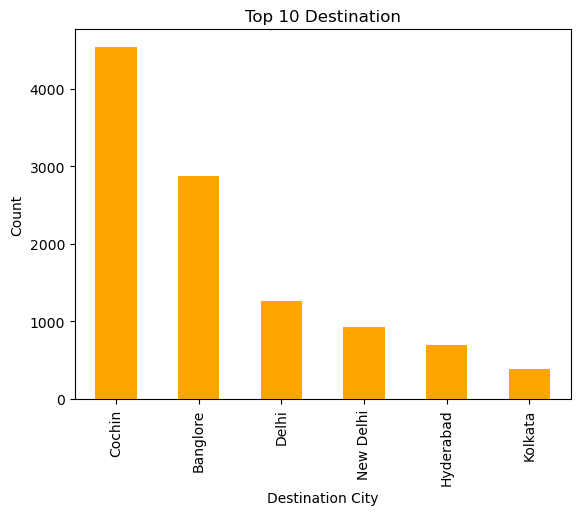

In [115]:
# Top Destinantion Cities

df['Destination'].value_counts().head(10).plot(kind='bar',title='Top 10 Destination',color='Orange')
plt.xlabel('Destination City')
plt.ylabel('Count')
plt.show()

In [116]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min,Route
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50,Banglore-New Delhi
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25,Kolkata-Banglore
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0,Delhi-Cochin
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25,Kolkata-Banglore
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45,Banglore-New Delhi


How does price vary with departure time (morning, afternoon, evening, night)?

In [117]:
def dep_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
    
df['Dep_time_slot'] = df['Dep_Hour'].apply(dep_time)

In [118]:
# average price by time slot

average_time_price = df.groupby('Dep_time_slot')['Price'].mean().reset_index().round(2)
average_time_price

,Dep_time_slot,Price
0,Afternoon,9392.82
1,Evening,9178.83
2,Morning,9202.28
3,Night,8179.47


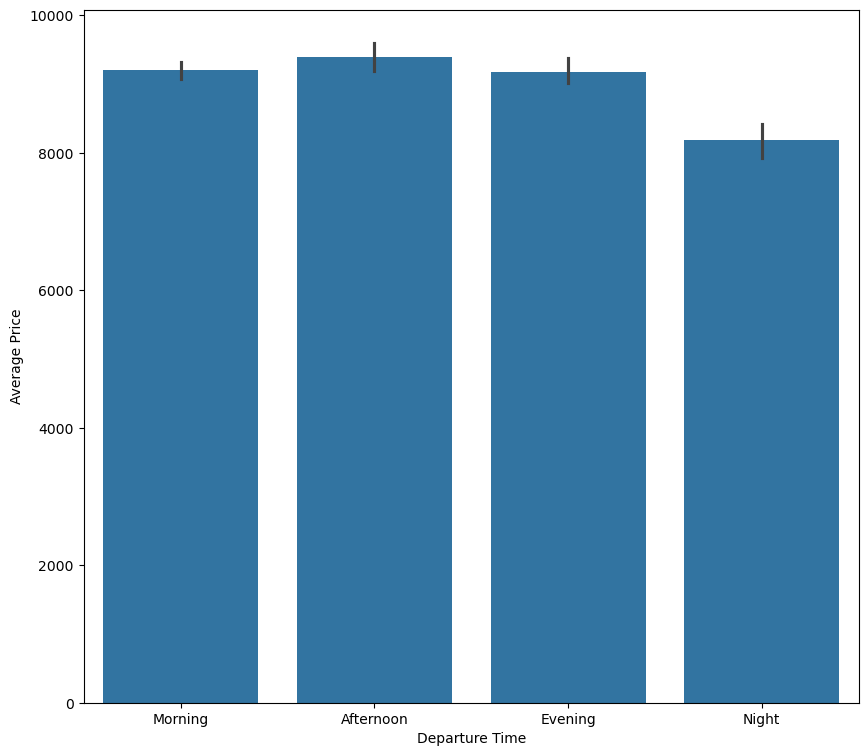

In [119]:
plt.figure(figsize=(10,9))
sns.barplot(x='Dep_time_slot',y='Price',data=df,order=['Morning','Afternoon','Evening','Night'])
plt.ylabel('Average Price')
plt.xlabel('Departure Time')
plt.show()

Which month has the highest average flight prices?

In [120]:
monthly_average_price = df.groupby('Month')['Price'].mean().reset_index().round(2).sort_values('Price',ascending=False)
monthly_average_price


# March has the hieghest average price and april has the least

,Month,Price
0,3,10673.21
2,5,9127.25
3,6,8828.80
1,4,5770.85


How many flights are non-stop, 1-stop, or multiple stops?

In [121]:
flights_stops = df.groupby('Total_Stops')['Airline'].count().reset_index()
flights_stops

,Total_Stops,Airline
0,1 stop,5625
1,2 stops,1520
2,3 stops,45
3,4 stops,1
4,non-stop,3491


Does the number of stops correlate with flight duration or price?

In [122]:
df.groupby('Total_Stops')[['Duration_hour','Duration_Min']].mean().round(2).reset_index()

,Total_Stops,Duration_hour,Duration_Min
0,1 stop,12.60,25.81
1,2 stops,20.10,27.82
2,3 stops,25.44,20.78
3,4 stops,29.00,30.00
4,non-stop,1.96,32.70


In [123]:
df.groupby('Total_Stops')['Price'].mean().reset_index().round(2)

,Total_Stops,Price
0,1 stop,10594.12
1,2 stops,12715.81
2,3 stops,13112.00
3,4 stops,17686.00
4,non-stop,5024.90


In [124]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min,Route,Dep_time_slot
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50,Banglore-New Delhi,Night
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25,Kolkata-Banglore,Morning
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0,Delhi-Cochin,Morning
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25,Kolkata-Banglore,Evening
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45,Banglore-New Delhi,Afternoon


In [125]:
df['Duration_min'] = df['Duration_hour']*60

In [126]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min,Route,Dep_time_slot,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50,Banglore-New Delhi,Night,120
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25,Kolkata-Banglore,Morning,420
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0,Delhi-Cochin,Morning,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25,Kolkata-Banglore,Evening,300
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45,Banglore-New Delhi,Afternoon,240


In [127]:
df['Total_duration_min'] = df['Duration_Min'] + df['Duration_min']
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_hour,Duration_Min,Route,Dep_time_slot,Duration_min,Total_duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,1,10,22,20,2,50,Banglore-New Delhi,Night,120,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,13,15,5,50,7,25,Kolkata-Banglore,Morning,420,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,4,25,9,25,19,0,Delhi-Cochin,Morning,1140,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,23,30,18,5,5,25,Kolkata-Banglore,Evening,300,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,21,35,16,50,4,45,Banglore-New Delhi,Afternoon,240,285


Define your X and y for model training

In [128]:
X = df[['Airline','Source','Destination','Total_Stops','Total_duration_min','Dep_time_slot']]
y = df['Price']



Check for datatypes for encoding selection

In [129]:
X.dtypes


Airline               object
Source                object
Destination           object
Total_Stops           object
Total_duration_min     int64
Dep_time_slot         object
dtype: object

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# using train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



# making separete category columns

categorical_col_in_X = ['Airline','Source','Destination','Dep_time_slot','Total_Stops']

numerical_col_in_X = ['Total_duration_min']

# dict to store the encoding

label_encoded = {}
scalers = {}

# applying for loop for encoding

for col in categorical_col_in_X:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])         # ensuring 1d array # fit transform for train data
    X_test[col] = le.transform(X_test[col])                 # ensuring 1d array # transform for test data
    label_encoded[col] = le                                 # saving in a dict

for col in numerical_col_in_X:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[[col]])     # ensuring 2d array # fit transform for train data
    X_test[col] = scaler.transform(X_test[[col]])             # ensuring 2d array # transform for test data
    scalers[col] = scaler                                       # saving in a dict



In [131]:
X_test.head(10)

,Airline,Source,Destination,Total_Stops,Total_duration_min,Dep_time_slot
6076,4,3,0,0,0.216084,2
3544,2,2,1,0,-0.198358,2
7313,4,3,0,0,-0.583196,0
5032,3,1,4,4,-0.987769,0
2483,4,2,1,0,-0.602931,3
9894,6,2,1,0,0.097672,2
346,4,2,1,0,-0.198358,2
6366,4,0,2,4,-0.908828,1
8270,8,1,4,4,-0.987769,1
3393,4,2,1,0,0.038466,2


In [132]:
# train with your data on a choosed model

# Since your y (Price) is numeric, you need a regression model.

# Linear Regression

from sklearn.linear_model import LinearRegression

lin = LinearRegression()


In [133]:
# Train (Fit) the model

lin.fit(X_train,y_train)

LinearRegression()

In [134]:
# make predections

y_pred = lin.predict(X_test)

In [135]:
# Evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = mse ** 0.5
r2_ = r2_score(y_test,y_pred)


print(f'Mae:{mae}')
print(f'Mse:{mse}')
print(f'Rmse:{rmse}')
print(f'R2:{r2_}')

Mae:2570.4276010459
Mse:12859620.203960976
Rmse:3586.0312608733593
R2:0.39238136320344064


"Model explains only ~39% of price variation with ~₹2.57K average error, indicating missing features and outlier impact — needs feature engineering and refinement."

In [173]:
# Implementing Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


def poly_regression(degree):                    # make object for the class PolynomialFeatures and LinearRegression
    poly_feature = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    
    # make the pipeline for poly and linear

    poly_reg = Pipeline([('poly_feature',poly_feature),
                        ('lin_reg',lin_reg)])
    
    # fit the model on train data 

    poly_reg.fit(X_train,y_train)

    # predict on train data and test data

    y_train_pred = poly_reg.predict(X_train)
    y_test_pred = poly_reg.predict(X_test)

    # plotting the line

poly_regression(2)
    

Polynomial Degree: 4
Train R²: 0.5740888642943878
Test R²: 0.5593428284286865
Test MAE: 2053.5750956327133


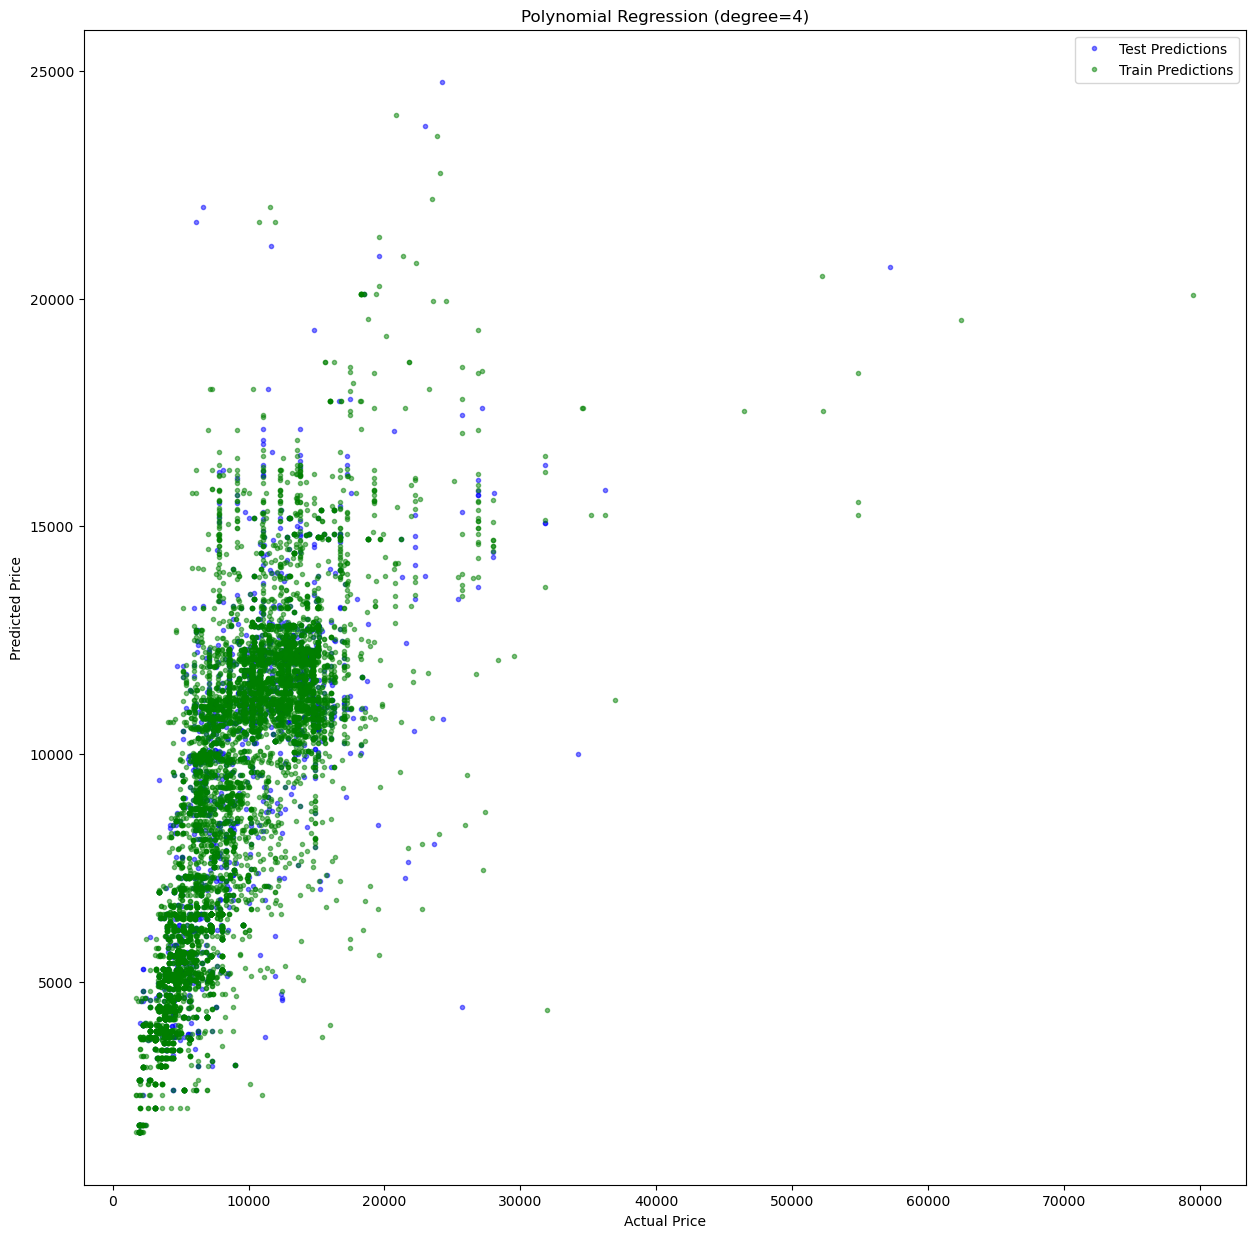

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

def poly_regression(degree):
    # Build polynomial regression pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    
    poly_reg = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    
    # Fit on training data
    poly_reg.fit(X_train, y_train)
    
    # Predict on test set
    y_test_pred = poly_reg.predict(X_test)
    
    # Metrics
    print(f"Polynomial Degree: {degree}")
    print("Train R²:", r2_score(y_train, y_train_pred))
    print("Test R²:", r2_score(y_test, y_test_pred))
    print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
    
    # Plot predicted vs actual prices for test set
    plt.figure(figsize=(15,15))
    plt.plot(y_test, y_test_pred, 'b.', alpha=0.5, label='Test Predictions')
    plt.plot(y_train, y_train_pred,'g.', alpha=0.5, label='Train Predictions')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.legend()
    plt.show()

# Example usage
poly_regression(4)